In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
from pmdarima import arima

In [192]:
pip install statsmodels --upgrade

     ---------------------------------------- 9.4/9.4 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_1 = pd.read_csv('C:/Users/lenovo/Desktop/gani/ResearchProject/KTMK_monthly.csv')
df_1.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,Apr-13,353.55,327.5,358.25,307.5,20.64M,8.28%
1,May-13,391.48,352,403.67,350.6,24.53M,10.73%
2,Jun-13,361.1,390.63,392.85,341.5,26.51M,-7.76%
3,Jul-13,326.17,361.5,381.15,311.25,37.96M,-9.67%
4,Aug-13,329.8,327.6,337.5,294,62.41M,1.11%


In [4]:
print(df_1.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')


In [5]:
df_2 = df_1[['Date','Price']]
df_2.head()

,Date,Price
0,Apr-13,353.55
1,May-13,391.48
2,Jun-13,361.1
3,Jul-13,326.17
4,Aug-13,329.8


In [12]:
df_2.dtypes

Price    float64
dtype: object

In [7]:
from datetime import datetime
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9908\4214241446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')


In [8]:
df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9908\355248658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')


In [10]:
df_2.set_index('Date',inplace=True)

In [13]:
df_2.head()

,Price
Date,
2013-04,353.55
2013-05,391.48
2013-06,361.10
2013-07,326.17
2013-08,329.80


In [14]:
print('shape of data',df_2.shape)

shape of data (120, 1)


<AxesSubplot:xlabel='Date'>

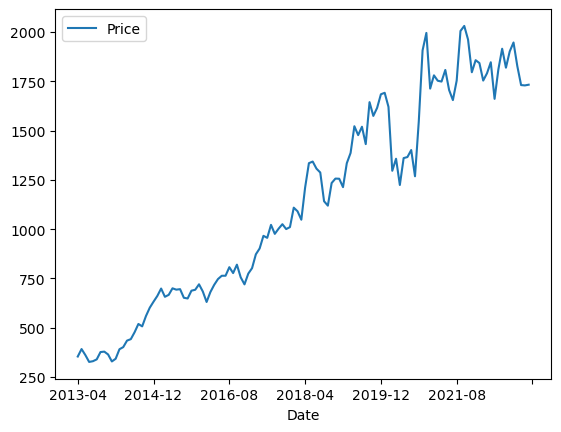

In [15]:
df_2.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df_2['Price'])

In [18]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['Price'])

ADF Test Statistic : -0.9831576208689407
p-value : 0.7593575007443908
#Lags Used : 8
Number of Observations Used : 111
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary


In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_2.Price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.983158
p-value: 0.759358


In [20]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_2.Price,test="adf")

0

In [21]:
df_2['first_diff'] = df_2['Price'].diff().dropna()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9908\1360018562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['first_diff'] = df_2['Price'].diff().dropna()


In [24]:
df_2.head()

,Price,first_diff
Date,,
2013-05,391.48,37.93
2013-06,361.10,-30.38
2013-07,326.17,-34.93
2013-08,329.80,3.63
2013-09,339.05,9.25


In [23]:
df_2.dropna(subset=['first_diff'], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9908\2139689955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(subset=['first_diff'], inplace=True)


In [25]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['first_diff'])

ADF Test Statistic : -6.87495839012984
p-value : 1.4826863549446608e-09
#Lags Used : 7
Number of Observations Used : 111
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary


In [26]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_2.first_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.874958
p-value: 0.000000


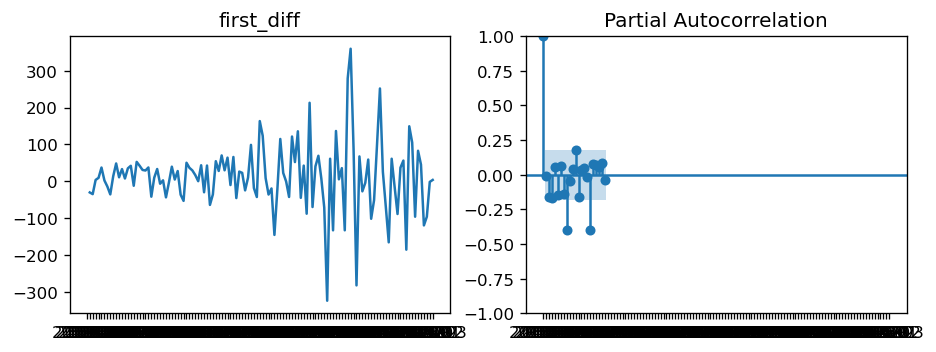

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_2.Price.diff()); axes[0].set_title('first_diff')
axes[1].set(ylim=(0,5))
plot_pacf(df_2.Price.diff().dropna(), ax=axes[1]) #plotiing of 1st diff

plt.show()
#p=0,d=1

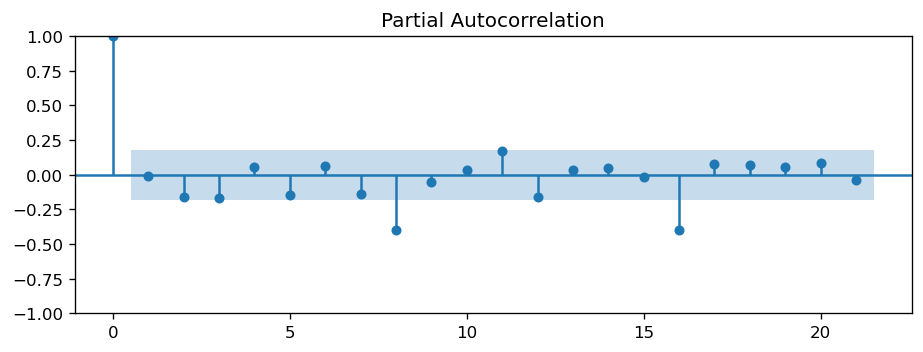

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.first_diff); axes[0].set_title('first_diff')
#axes[1].set(ylim=(0,5))
plot_pacf(df_2.first_diff.dropna())#, ax=axes[1])

plt.show()

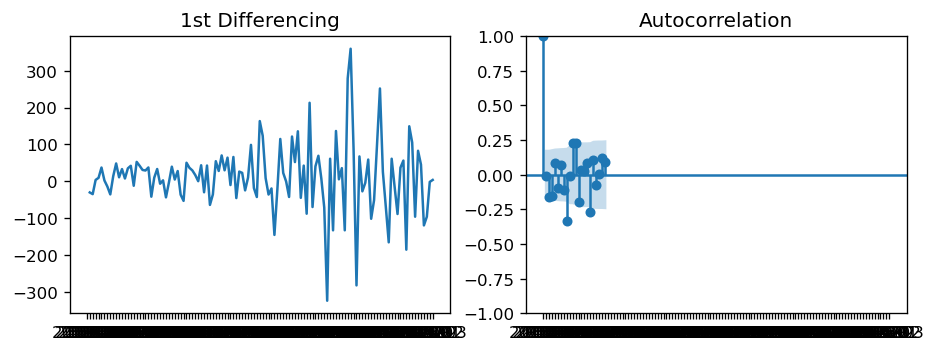

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_2.Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_2.Price.diff().dropna(), ax=axes[1])

plt.show()

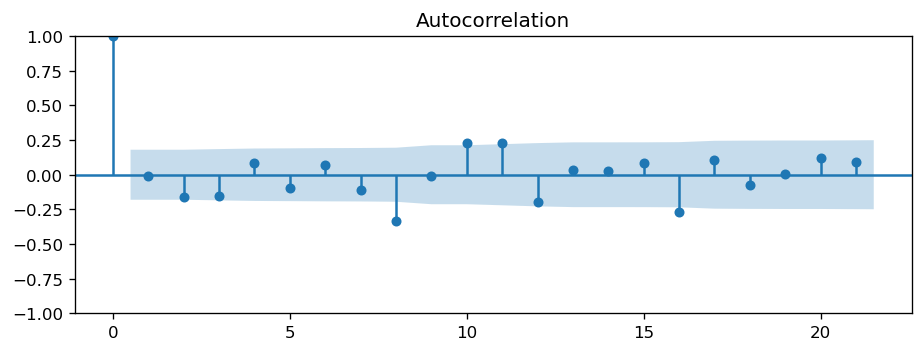

In [30]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.Price.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,1.2))
plot_acf(df_2.Price.diff().dropna())

plt.show()
#q=0

In [31]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(df_2['Price'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -699.137
Date:                Tue, 14 Nov 2023   AIC                           1404.273
Time:                        11:20:03   BIC                           1412.585
Sample:                    05-01-2013   HQIC                          1407.648
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6964      0.280      2.490      0.013       0.148       1.244
ma.L1         -0.7885      0.258     -3.052      0.002      -1.295      -0.282
sigma2      8204.2472    725.021     11.316      0.0

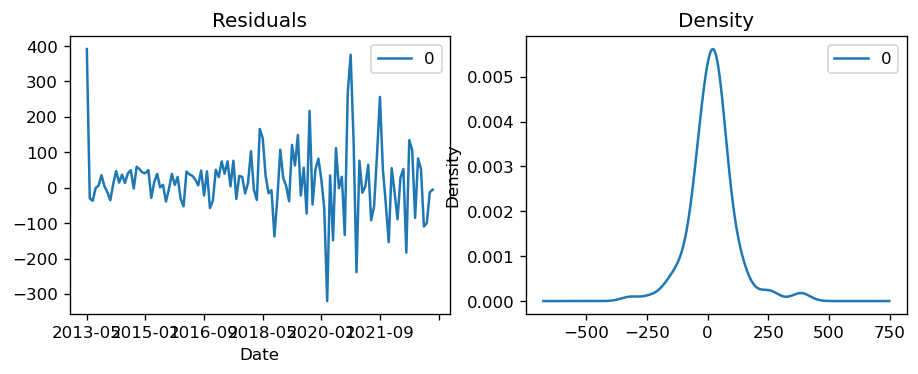

In [32]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [33]:
import matplotlib.pyplot as plt

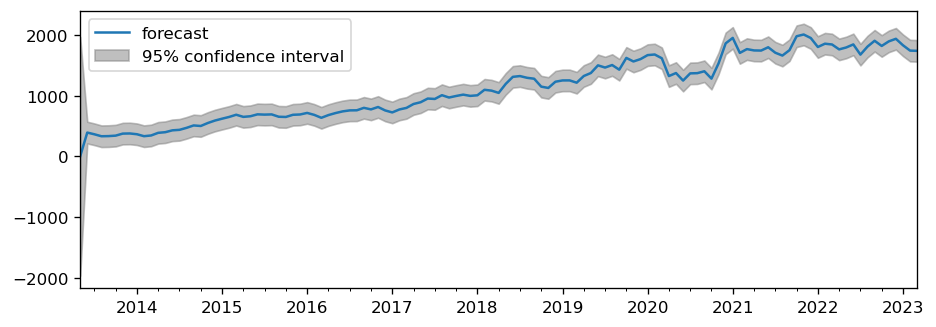

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
# Actual vs Fitted
#model_fit.plot_predict(dynamic=False)
plot_predict(model_fit,dynamic=False)
plt.show()

In [35]:
from statsmodels.tsa.stattools import acf
# Assuming df is your DataFrame
train = df_2['Price'][:55] # first 55 values 
test = df_2['Price'][55:] # from 56th till last

In [36]:
print('shape of train\n',train.shape)
print('shape of train\n',test.shape)
#55+64 =119 (1 nan value)

shape of train
 (55,)
shape of train
 (64,)


MODEL BUILD FOR TRAIN AND TEST DATA

In [37]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit() 

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [39]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


In [40]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


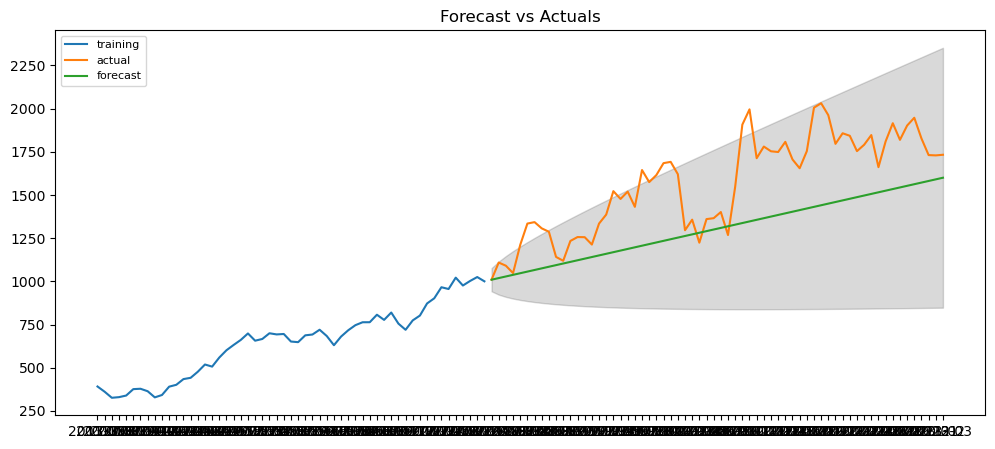

In [41]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [42]:
train.head()

Date
2013-05    391.48
2013-06    361.10
2013-07    326.17
2013-08    329.80
2013-09    339.05
Name: Price, dtype: float64

-- BEST RESULTS FROM ORDER(1,2,2)

In [43]:


model = ARIMA(train, order=(1,2,2))  
fitted = model.fit() 
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   55
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -263.295
Date:                Tue, 14 Nov 2023   AIC                            534.590
Time:                        11:22:13   BIC                            542.471
Sample:                    05-01-2013   HQIC                           537.621
                         - 11-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.151     -5.958      0.000      -1.192      -0.602
ma.L1         -0.0009      4.858     -0.000      1.000      -9.522       9.520
ma.L2         -0.9991      0.256     -3.904      0.0

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [49]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


In [50]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


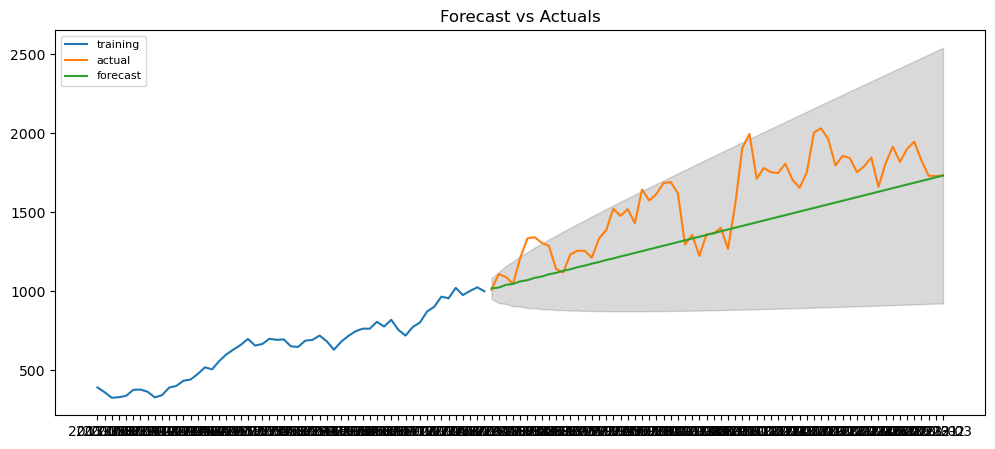

In [51]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show() # 1,2,2

In [46]:
# Assuming forecast_result holds the forecasted values in an array or DataFrame
#forecast_values = forecast_result.values  # Extract forecast values
forecast_values = forecast_result.predicted_mean  # Extract forecast values


In [70]:
test.head()

Date
2017-12    1010.20
2018-01    1108.95
2018-02    1090.55
2018-03    1047.80
2018-04    1211.10
Name: Price, dtype: float64

In [66]:
print("Shape of the DataFrame:", test.shape)

Shape of the DataFrame: (64,)


In [69]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast_values-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(forecast_values, test.values)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9908\2315257816.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9908\2315257816.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.1573298778422489,
 'me': -258.6808644250428,
 'mae': 262.0590634393265,
 'mpe': -0.15461501531408023,
 'rmse': 305.6289792143198,
 'acf1': nan,
 'corr': 0.8392577092526025,
 'minmax': 0.15727303767340328}

MAPE (Mean Absolute Percentage Error)

ME (Mean Error)

MAE (Mean Absolute Error)

MPE (Mean Percentage Error)

RMSE (Root Mean Squared Error)

correlation coefficient

minmax accuracy

ACF1 (Auto-correlation of errors at lag 1).

--Around 15.73% MAPE implies the model is about 84.27% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually.

In [72]:
from pmdarima import auto_arima
#try diff order and assign a score ,Goal to minimise AIC (p,d,q)
stepwise_fit = auto_arima(df_2['Price'],trace =True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1401.729, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1402.364, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1404.351, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1404.345, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1402.208, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1399.646, Time=0.65 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1397.356, Time=0.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1397.266, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1403.110, Time=0.23 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1399.209, Time=0.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1398.997, Time=0.57 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1402.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -693.633
Date:                Tue, 14 Nov 2023   AIC                           1397.266
Time:                        11:50:35   BIC                           1411.119
Sample:                    05-01-2013   HQIC                          1402.891
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.1190      2.336      5.616      0.000       8.541      17.697
ma.L1         -0.0575      0.075     -0.761      0.446      -0.205       0.090
ma.L2         -0.3240      0.066     -4.943      0.000      -0.452      -0.196
ma.L3         -0.3301      0.068     -4.887      0.000      -0.462      -0.198
sigma2      7422.8285    748.753      9.914      0.000    5955.299    8890.358
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.89
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              15.56   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

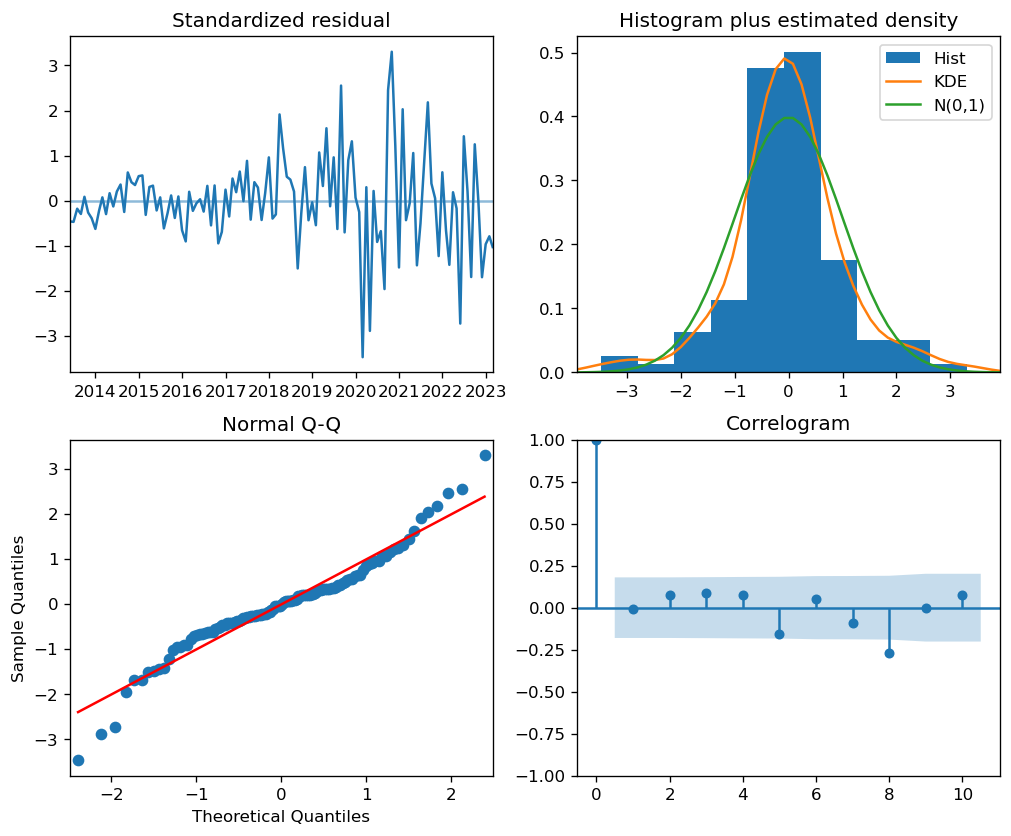

In [73]:
stepwise_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [149]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df_2.Price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1423.154, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2037.567, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1423.171, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1423.202, Time=0.21 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.858 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -708.577
Date:        

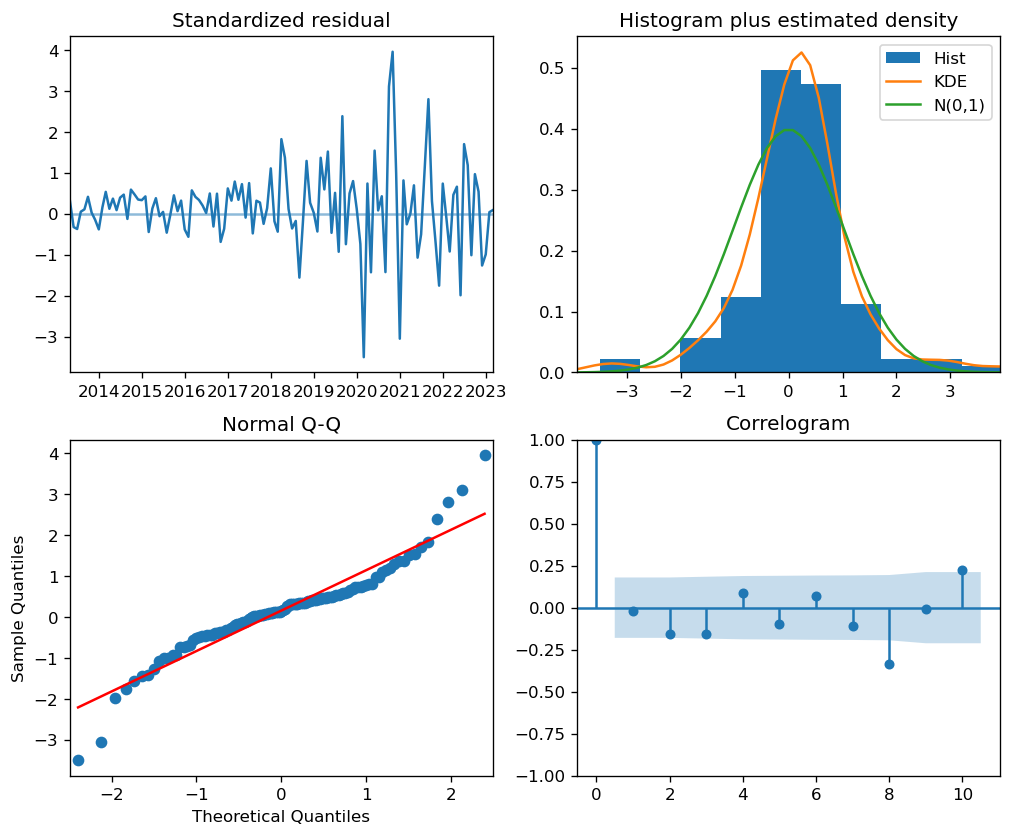

In [80]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [112]:
df_3=df_2.copy()

In [117]:
df_3.head()

,Date,Price,first_diff
0,2013-05,391.48,37.93
1,2013-06,361.10,-30.38
2,2013-07,326.17,-34.93
3,2013-08,329.80,3.63
4,2013-09,339.05,9.25


In [114]:
df_3.reset_index(drop=False, inplace=True)

In [125]:
print(df_2.columns)

Index(['Price', 'first_diff'], dtype='object')


In [174]:
print(confint)

[[1549.4400878  1907.08058432]
 [1469.88116307 1977.33215456]
 [1408.15637204 2029.77465297]
 [1355.65217992 2073.02154685]
 [1309.05285982 2110.38849578]
 [1266.66140161 2143.57244277]
 [1227.47032979 2173.58079639]
 [1190.82316815 2201.0699661 ]
 [1156.26370889 2226.4960931 ]
 [1123.45954596 2250.19151703]
 [1092.15951105 2272.40734   ]
 [1062.16826843 2293.33883169]
 [1033.33030102 2313.14144331]
 [1005.51936282 2331.94135518]
 [ 978.63127585 2349.84267976]
 [ 952.57885968 2366.93253214]
 [ 927.2882688  2383.28469268]
 [ 902.69628741 2398.96231219]
 [ 878.74829235 2414.01994903]
 [ 855.39669273 2428.50512945]
 [ 832.59971653 2442.459561  ]
 [ 810.32045434 2455.92008882]
 [ 788.52609636 2468.91945858]
 [ 767.18731719 2481.48693176]]


In [175]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)


index_of_fc = np.arange(len(df_2.Price), len(df_2.Price)+n_periods)

#forecast_index = pd.date_range(start='2023-04-01', periods=n_periods, freq='MS')

#forecast_index = pd.date_range(start=df_2.Price.index[-1], periods=n_periods + 1, freq='MS')[1:]

# make series for plotting purpose

fc_series = pd.Series(fc_data, index=index_of_fc)
#fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

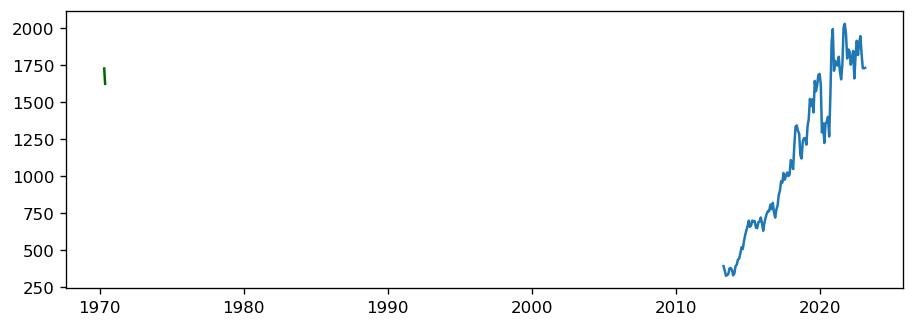

In [177]:
# Plot
plt.plot(df_2.Price)
plt.plot(fc_series, color='darkgreen')


In [164]:
# Your data
fc_data = [
    1728.260336, 1723.606659, 1718.965513, 1714.336863, 1709.720678,
    1705.116922, 1700.525563, 1695.946567, 1691.379901, 1686.825531,
    1682.283426, 1677.753550, 1673.235872, 1668.730359, 1664.236978,
    1659.755696, 1655.286481, 1650.829300, 1646.384121, 1641.950911,
    1637.529639, 1633.120272, 1628.722777, 1624.337124
]
index_of_fc = list(range(119, 143))

# Create Series with specified index
fc_series = pd.Series(fc_data, index=index_of_fc)

print(fc_series)

119    1728.260336
120    1723.606659
121    1718.965513
122    1714.336863
123    1709.720678
124    1705.116922
125    1700.525563
126    1695.946567
127    1691.379901
128    1686.825531
129    1682.283426
130    1677.753550
131    1673.235872
132    1668.730359
133    1664.236978
134    1659.755696
135    1655.286481
136    1650.829300
137    1646.384121
138    1641.950911
139    1637.529639
140    1633.120272
141    1628.722777
142    1624.337124
dtype: float64


In [ ]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [145]:
print(index_of_fc)

[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142]


In [130]:
print(fc)

2023-04-01    1728.260336
2023-05-01    1723.606659
2023-06-01    1718.965513
2023-07-01    1714.336863
2023-08-01    1709.720678
2023-09-01    1705.116922
2023-10-01    1700.525563
2023-11-01    1695.946567
2023-12-01    1691.379901
2024-01-01    1686.825531
2024-02-01    1682.283426
2024-03-01    1677.753550
2024-04-01    1673.235872
2024-05-01    1668.730359
2024-06-01    1664.236978
2024-07-01    1659.755696
2024-08-01    1655.286481
2024-09-01    1650.829300
2024-10-01    1646.384121
2024-11-01    1641.950911
2024-12-01    1637.529639
2025-01-01    1633.120272
2025-02-01    1628.722777
2025-03-01    1624.337124
Freq: MS, dtype: float64


In [84]:
len(df_2.Price)

119

In [131]:
print(np.arange(len(df_2.Price), len(df_2.Price)+n_periods))

[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142]


In [132]:
print(np.arange(len(df_2.Price), len(df_2.Price)+n_periods))

[119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142]


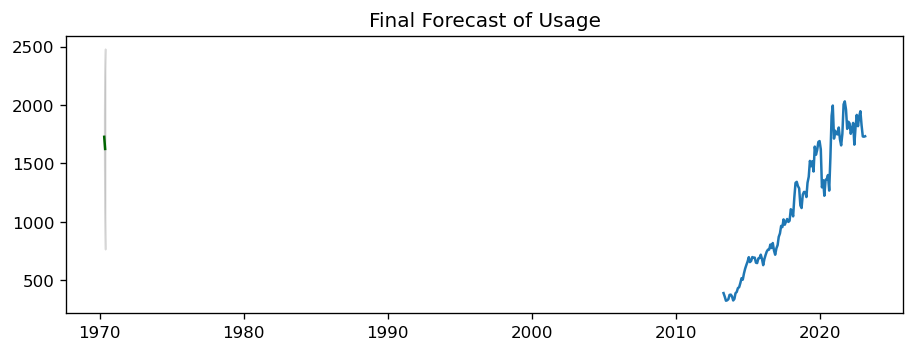

In [167]:
# Plot
plt.plot(df_2.Price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

In [ ]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


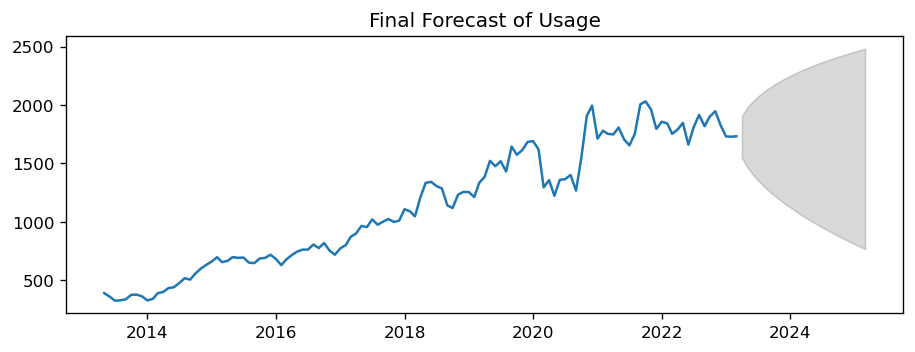

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_2 is your DataFrame with a date index and columns 'Price' and 'first_diff'

# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Generate a date range starting from the last date in df_2.Price for the forecast index
forecast_index = pd.date_range(start=df_2.index[-1], periods=n_periods+1, freq='MS')[1:]

# Create fc_series with the forecast values and the new index
fc_series = pd.Series(fc, index=forecast_index)

# make lower and upper series for confidence intervals
lower_series = pd.Series(confint[:, 0], index=forecast_index)
upper_series = pd.Series(confint[:, 1], index=forecast_index)

# Plot
plt.plot(df_2.index, df_2['Price'])  # Plot original data using the DataFrame's index and 'Price' column
plt.plot(fc_series.index, fc_series, color='darkgreen')  # Plot forecasted values
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)  # Confidence interval

plt.title("Final Forecast of Usage")
plt.show()


In [136]:
df_2.index = pd.to_datetime(df_2.index)
df_2.index = df_2.index.tz_convert(None)

TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize

In [137]:
df_2.index = df_2.index.tz_localize('UTC')

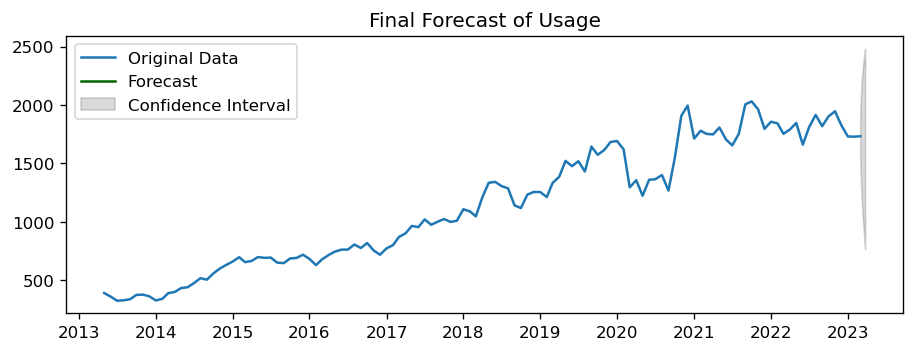

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_2 is your DataFrame with a date index and columns 'Price' and 'first_diff'

# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Generate date indices for the forecast
forecast_index = pd.date_range(start=df_2.index[-1], periods=n_periods, freq=df_2.index.freq)

# Create Series for forecasted values and confidence intervals
fc_series = pd.Series(fc, index=forecast_index)
lower_series = pd.Series(confint[:, 0], index=forecast_index)
upper_series = pd.Series(confint[:, 1], index=forecast_index)

# Plot
plt.plot(df_2.index, df_2['Price'], label='Original Data')  # Plot original data
plt.plot(fc_series.index, fc_series, color='darkgreen', label='Forecast')  # Plot forecasted values
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15, label='Confidence Interval')  # Confidence interval

plt.title("Final Forecast of Usage")
plt.legend()  # Show legend
plt.show()


In [85]:
# Forecast
forecast_steps = 64
forecast_result = stepwise_fit.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
index_of_fc = test.index[:forecast_steps]
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=index_of_fc)


AttributeError: 'ARIMA' object has no attribute 'get_forecast'

In [ ]:
# Forecast
forecast_steps = 64
forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [93]:
model = ARIMA(df_2['Price'], order=(0, 1, 3))
fitted_model = model.fit()
# Forecast
forecast_steps = 24
forecast_result = fitted_model.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
index_of_fc = test.index[:forecast_steps]
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=index_of_fc)


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [94]:
fc_series = pd.Series(forecast_result.predicted_mean[:forecast_steps].values, index=test.index[:forecast_steps], dtype=float)


In [98]:
# Assuming your date index is in a datetime format
#fc_series.index = fc_series.index.tz_localize(None)

#fc_series.index = fc_series.index.tz_convert(None)

fc_series.index = fc_series.index.tz_convert('US/Eastern')

AttributeError: 'Index' object has no attribute 'tz_convert'

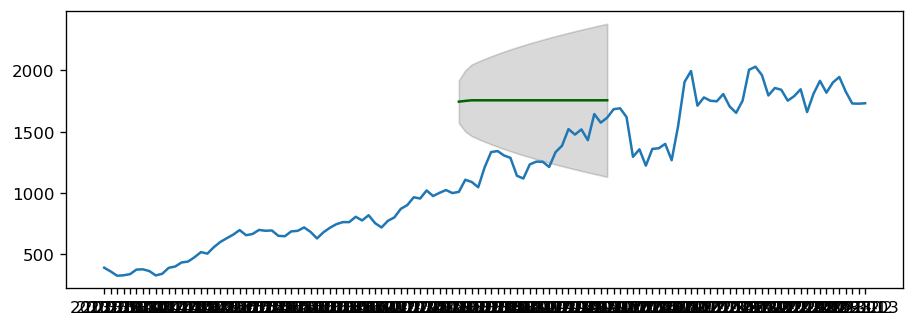

In [99]:
# Plot
plt.plot(df_2.Price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

In [92]:
import statsmodels.api as sm

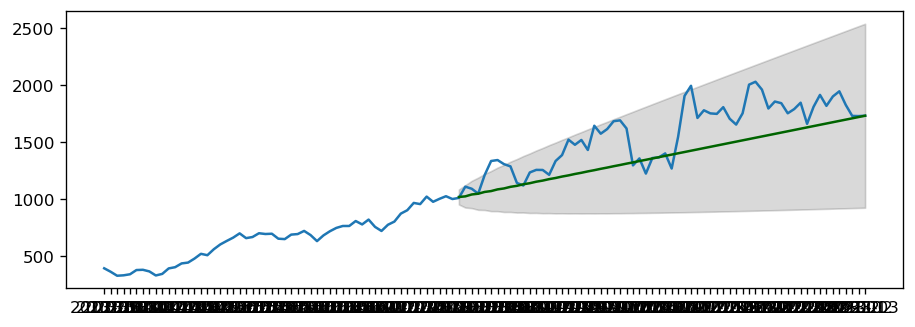

In [141]:

forecast_result = fitted.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean[:forecast_steps]
conf_int = forecast_result.conf_int()[:forecast_steps]

# Make as pandas series
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=test.index[:forecast_steps])
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=test.index[:forecast_steps])


In [81]:
# Assuming your date index is in a datetime format
fc_series.index = fc_series.index.tz_localize(None)


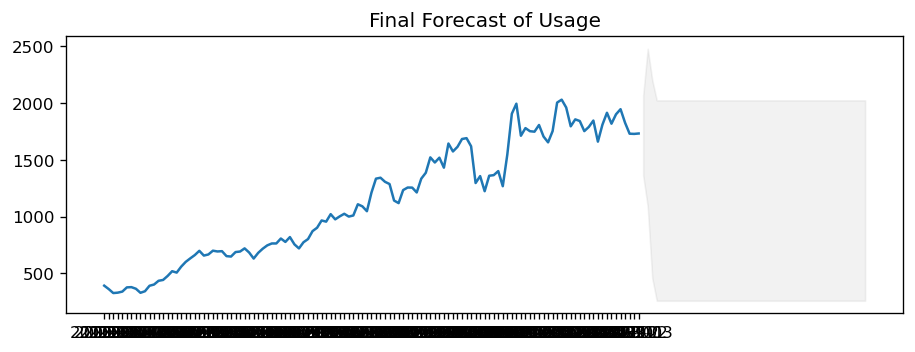

In [140]:
# Plot
plt.plot(df_2.Price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.05)

plt.title("Final Forecast of Usage")
plt.show()

In [139]:
# Assuming you've fitted your ARIMA model
model = ARIMA(df_2['Price'], order=(0, 0, 3))
fitted_model = model.fit()

# Forecast
forecast_steps = 50
forecast_result = fitted_model.get_forecast(steps=forecast_steps)

# Extract forecast and confidence intervals
fc_series = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Make as pandas series
index_of_fc = np.arange(len(df_2.Price), len(df_2.Price) + forecast_steps)
fc_series = pd.Series(fc_series, index=index_of_fc)
lower_series = pd.Series(conf_int.iloc[:, 0].values, index=index_of_fc)
upper_series = pd.Series(conf_int.iloc[:, 1].values, index=index_of_fc)


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [180]:
df_3=df_2.copy()

In [178]:
import statsmodels.api as sm

In [195]:
model=sm.tsa.statespace.SARIMAX(df_2['Price'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

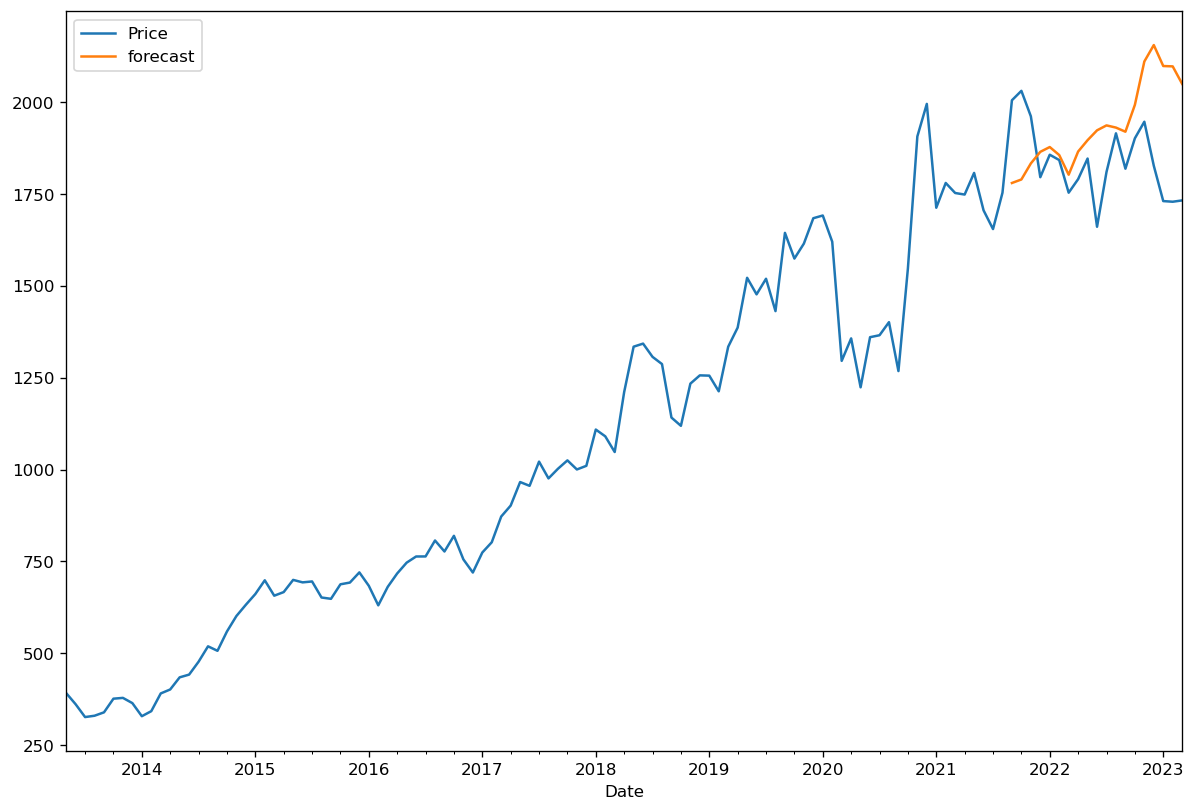

In [196]:
df_3['forecast']=results.predict(start=100,end=120,dynamic=True)
df_3[['Price','forecast']].plot(figsize=(12,8))

In [197]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_3.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [198]:
future_datest_df_3=pd.DataFrame(index=future_dates[1:],columns=df_3.columns)

In [199]:
future_datest_df_3.tail()

,Price,first_diff,forecast
2024-10-01 00:00:00+00:00,NaN,NaN,NaN
2024-11-01 00:00:00+00:00,NaN,NaN,NaN
2024-12-01 00:00:00+00:00,NaN,NaN,NaN
2025-01-01 00:00:00+00:00,NaN,NaN,NaN
2025-02-01 00:00:00+00:00,NaN,NaN,NaN


In [200]:
future_df_3=pd.concat([df_3,future_datest_df_3])

<AxesSubplot:>

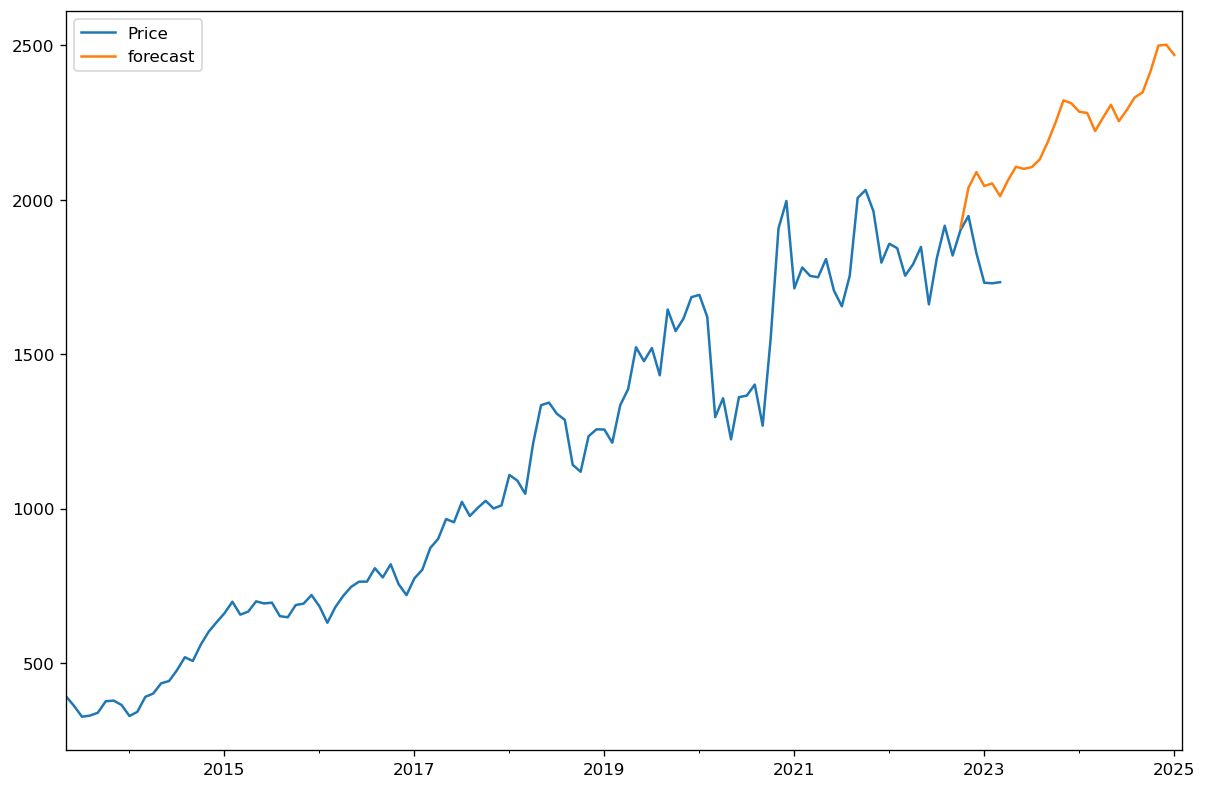

In [201]:
future_df_3['forecast'] = results.predict(start = 113, end = 140, dynamic= True)  
future_df_3[['Price', 'forecast']].plot(figsize=(12, 8)) 